# Bike Sharing Assignment by Priyanka Parab

## Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider **BoomBikes** has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

* Which variables are significant in predicting the demand for shared bikes.
* How well those variables describe the bike demands <br>

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


**Business Goal**:<br>
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.



# Importing required libraries

In [415]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [416]:
# Import of required libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading and Understanding the Data

In [417]:
df1 = pd.read_csv("day.csv")

In [418]:
# Check the head of the dataset
df1.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# Data Cleaning and Exploratory Data Analysis 

In [419]:
#Checking Info of the dataframe df1
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [420]:
# decribe dataframe df1
df1.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [421]:
# checking for null values in the dataset
df1.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [422]:
#Renaming the columns with short names with full name
df1.rename(columns = {'yr':'Year','mnth':'month','hum':'humidity','cnt':'Rentals'}, inplace = True) 
df1.head()

,instant,dteday,season,Year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,Rentals
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [423]:
# Mapping variables season, month, weathersit, weekday

df1['season']=df1.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
df1['month']=df1.month.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
df1['weathersit']=df1.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})
df1['weekday']=df1.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

df1.head()

,instant,dteday,season,Year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,Rentals
0,1,01-01-2018,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Removing redundant & unwanted columns

Based on checking data and data dictionary, following variables can be removed from further analysisis: 

1) **instant** : Its only an index value

2) **dteday** : This has the date, Since we already have seperate columns for 'year' & 'month',hence, we could live without this column.

3) **casual & registered** : Both these columns contains the count of bike booked by different categories of customers. Since our objective is to find the total count of bikes and not by specific category, we will ignore these two columns. More over, we have created a new variable to have the ratio of these customer types.


In [424]:
df1.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)
df1.head()

,season,Year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,Rentals
0,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


# Univariate Analysis

#### Visualizing Binary Columns 

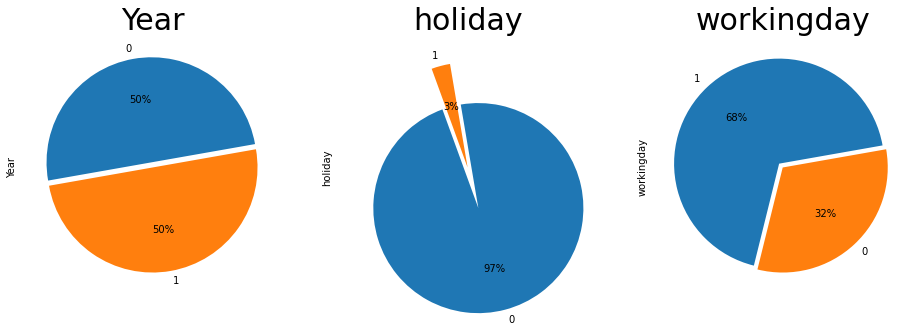

In [425]:
plt.figure(figsize = [16,15])
plt.subplot(131)
df1['Year'].value_counts(normalize = True).plot.pie(explode=(0.05, 0), autopct = "%1.0f%%", startangle=10)
plt.title('Year',fontsize=30)
plt.subplot(132) 
df1['holiday'].value_counts(normalize = True).plot.pie(explode=(0.4, 0), autopct = "%1.0f%%", startangle=110)
plt.title('holiday',fontsize=30)
plt.subplot(133)
df1['workingday'].value_counts(normalize = True).plot.pie(explode=(0.05, 0),autopct = "%1.0f%%", startangle=10)
plt.title('workingday',fontsize=30)
plt.show()

* **Observation**:
    - 'Year' is expected to be 50%-50% daily records of bike usage. 
    - Significantly less number of holidays(1) as compared to non-holidays(0) hence bike usage is more in 0. 
    - The same case applies to 'workingday' due to higher number of days vs non-working days.

#### Visualizing Categorical Variables

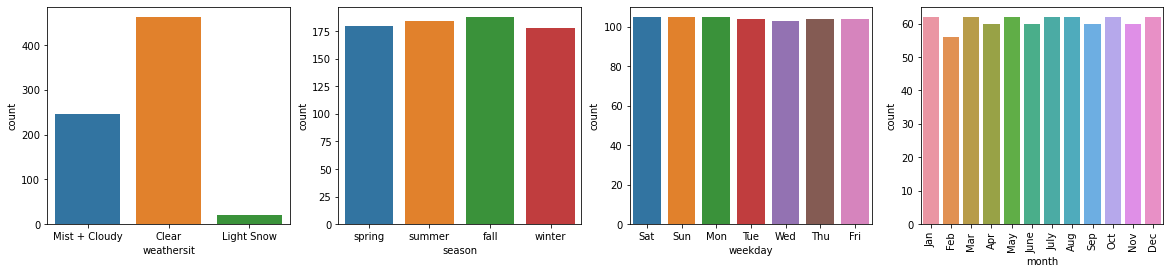

In [426]:
plt.figure(figsize = [20,4])
plt.subplot(1,4,1)
sns.countplot(data = df1, x = 'weathersit')
plt.subplot(1,4,2)
sns.countplot(data = df1, x = 'season')
plt.subplot(1,4,3)
sns.countplot(data = df1, x = 'weekday')
plt.subplot(1,4,4)
plt.xticks(rotation = 90)
sns.countplot(data = df1, x = 'month')
plt.show()

* By observing the plots we can came to conclusion that
    - When 'weathersit' is Clear, Few clouds, Partly cloudy the bikes are usage are more. 
    - The rest of the variables are shows very close values.

# Bivariate Analysis

#### Visualizing Binary Variables vs 'Rentals'

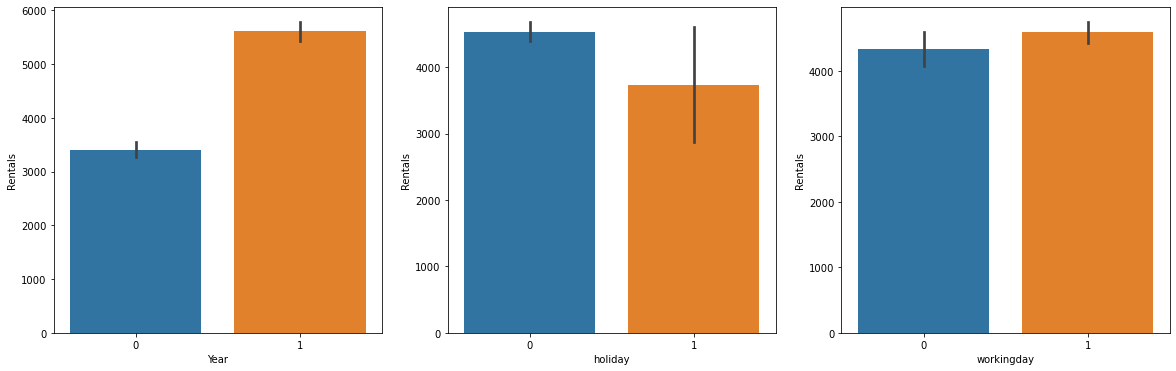

In [427]:
plt.figure(figsize = [20,6])
plt.subplot(1,3,1)
sns.barplot('Year', 'Rentals', data = df1 )
plt.subplot(1,3,2)
sns.barplot('holiday', 'Rentals', data = df1)
plt.subplot(1,3,3)
sns.barplot('workingday', 'Rentals', data = df1)
plt.show()

* By observing the plots we can came to conclusion that
    - There is a increase in number of bike users from year 2018(0) to year 2019(1).
    - There are more users during holidays(0) as compared to Non holidays(1).
    - There is a very little discrepancy between users of BoomBike on a working day(1) and non-working day(0).

#### Visualizing Catagorical Variables Variables vs 'Rentals' 

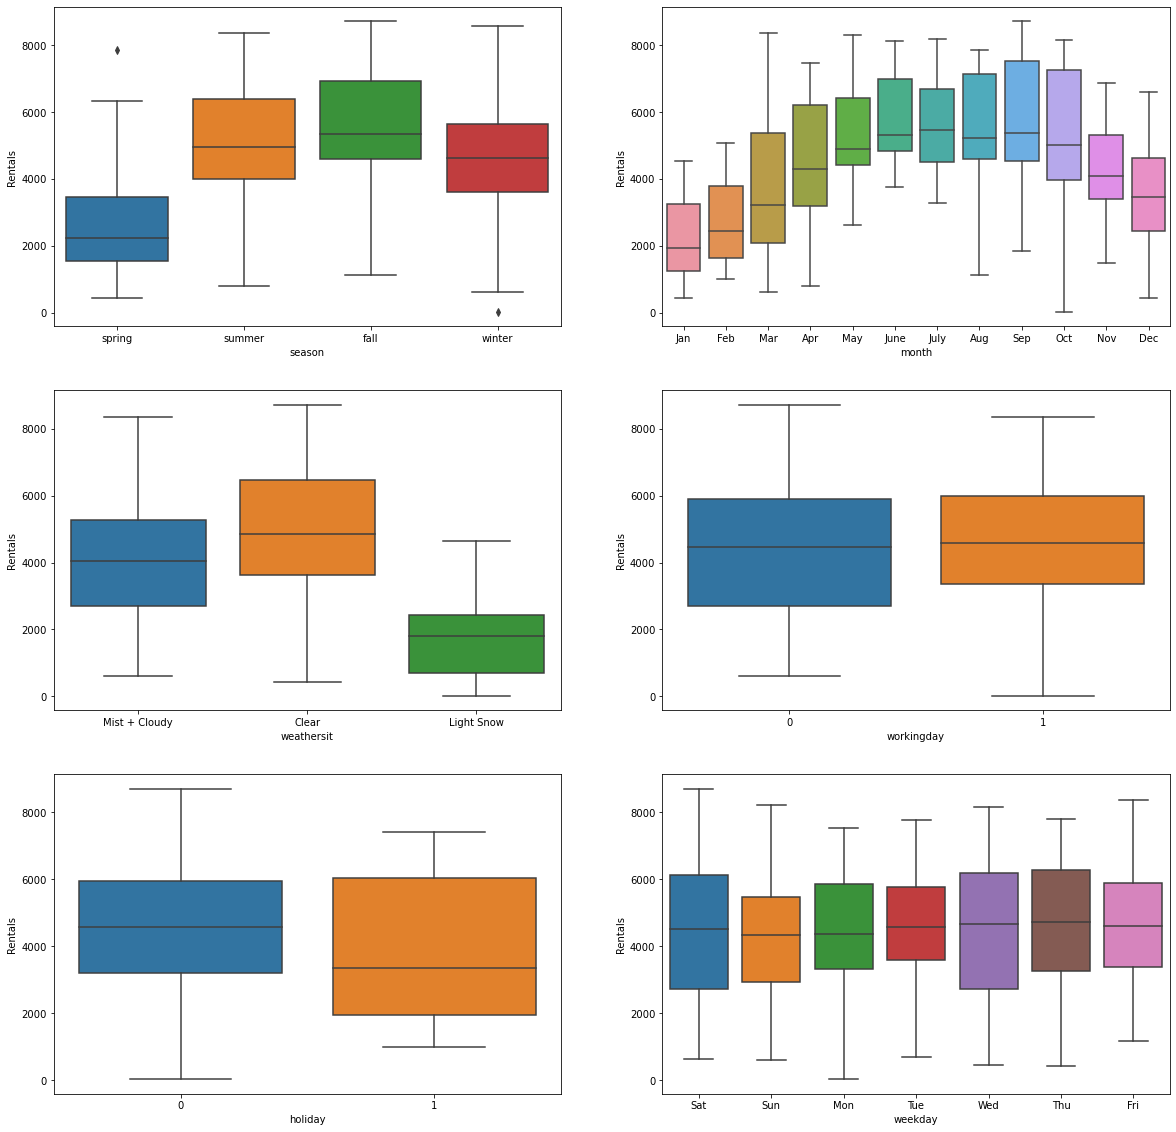

In [428]:
plt.figure(figsize=(20,20))
plt.subplot(3,2,1)
sns.boxplot(x = 'season',y='Rentals',data=df1)
plt.subplot(3,2,2)
sns.boxplot(x = 'month',y='Rentals',data=df1)
plt.subplot(3,2,3)
sns.boxplot(x = 'weathersit',y='Rentals',data=df1)
plt.subplot(3,2,4)
sns.boxplot(x = 'workingday',y='Rentals',data=df1)
plt.subplot(3,2,5)
sns.boxplot(x = 'holiday',y='Rentals',data=df1)
plt.subplot(3,2,6)
sns.boxplot(x = 'weekday',y='Rentals',data=df1)
plt.show()

**Insights**: <br>


* **season**: Higest booking happening in season fall with a median of over 5000 booking. This was followed by season summer & season winter of total booking. This indicates, season can be a good predictor for the dependent variable.<br>

* **month**: Bike booking is quite high in the months May,Jun,Jul,Aug & Sept with a median of over 4000 booking per month. This indicates, mnth has some trend for bookings and can be a good predictor for the dependent variable.<br>

* **weathersit**: Almost 67% of the bike booking were happening during ‘weathersit 'Clear' with a median of close to 5000 booking. This was followed by weathersit 'Mist cloudy'. This indicates, weathersit does show some trend towards the bike bookings and can be a good predictor for the dependent variable.<br>

* **holiday**: The bike booking were happening mostly when it is not a holiday which indicates the data could be biased. We  should consider not using it as a predictor for the dependent variable.<br>

* **weekday**: weekday variable shows very close trend. This variable can have some or no influence towards the predictor. I will let the model decide if this needs to be added or not.<br>

* **workingday**: Median is quite close. Lets see how model decides about workingday<br>

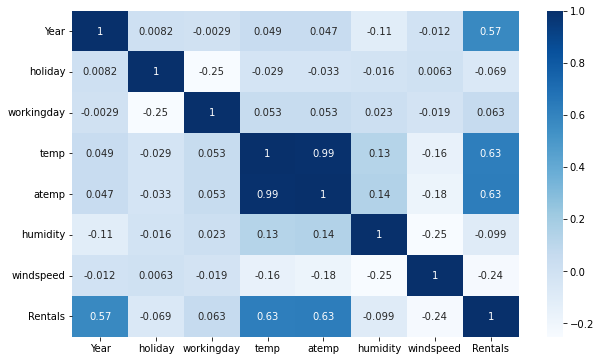

In [429]:
# Let's check the correlation coefficients to see which variables are highly correlated.

plt.figure(figsize = (10,6))
sns.heatmap(df1.corr(), annot = True, cmap="Blues")
plt.show()

# Creating Dummy Variables

In [430]:
bike_new = pd.get_dummies(df1,drop_first=True)
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      730 non-null    int64  
 1   holiday                   730 non-null    int64  
 2   workingday                730 non-null    int64  
 3   temp                      730 non-null    float64
 4   atemp                     730 non-null    float64
 5   humidity                  730 non-null    float64
 6   windspeed                 730 non-null    float64
 7   Rentals                   730 non-null    int64  
 8   season_spring             730 non-null    uint8  
 9   season_summer             730 non-null    uint8  
 10  season_winter             730 non-null    uint8  
 11  month_Aug                 730 non-null    uint8  
 12  month_Dec                 730 non-null    uint8  
 13  month_Feb                 730 non-null    uint8  
 14  month_Jan 

# Splitting the data

In [431]:
import sklearn
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(bike_new, train_size = 0.70, test_size = 0.30, random_state = 333)


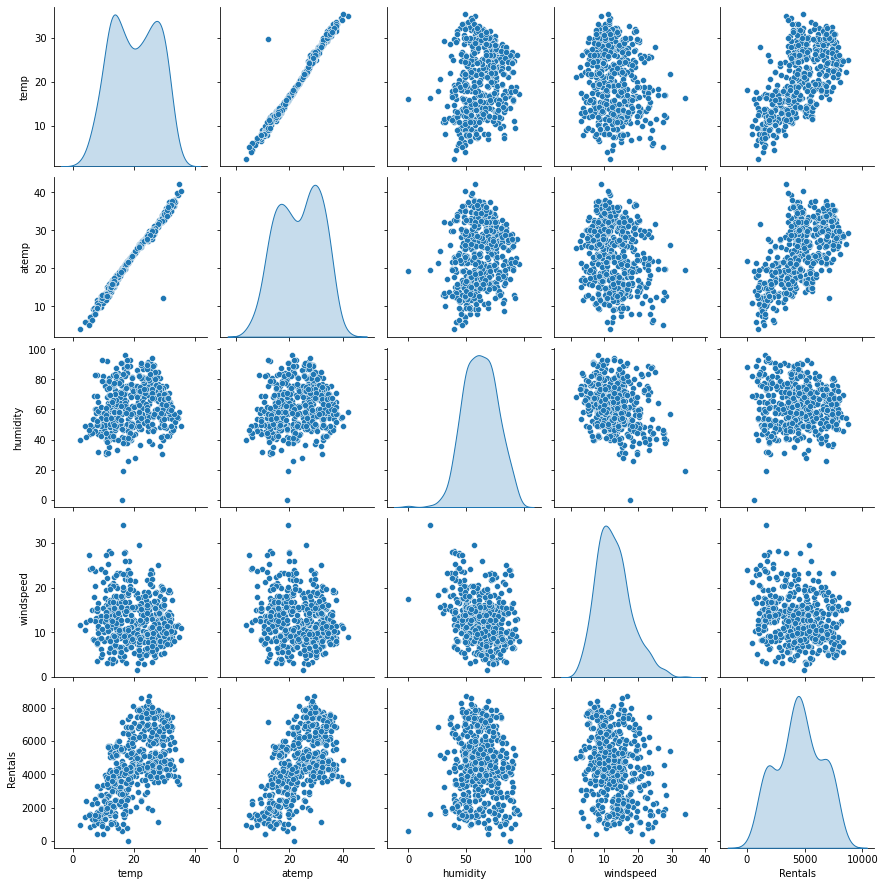

In [432]:
bike_num=df_train[[ 'temp', 'atemp', 'humidity', 'windspeed','Rentals']]
sns.pairplot(bike_num, diag_kind='kde')
plt.show()

# Rescaling the Features

In [433]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [434]:
# Apply scaler() to all the numeric variables

num_vars = ['temp', 'atemp', 'humidity', 'windspeed','Rentals']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [435]:
# Checking values after scaling
df_train.head()

,Year,holiday,workingday,temp,atemp,humidity,windspeed,Rentals,season_spring,season_summer,...,month_Oct,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow,weathersit_Mist + Cloudy
483,1,0,0,0.497426,0.487055,0.609956,0.194850,0.722734,0,1,...,0,0,0,0,1,0,0,0,0,0
650,1,0,0,0.416433,0.409971,0.513852,0.255118,0.815347,0,0,...,1,0,0,1,0,0,0,0,0,0
212,0,0,1,0.887856,0.819376,0.572294,0.276919,0.488265,0,0,...,0,0,1,0,0,0,0,0,0,0
714,1,0,0,0.378013,0.381804,0.871429,0.161523,0.433042,0,0,...,0,0,0,0,1,0,0,0,0,1
8,0,0,0,0.098690,0.048706,0.451083,0.700017,0.092039,1,0,...,0,0,0,0,1,0,0,0,0,0


# Building a Linear Model

Dividing into X and Y sets for the model building

In [436]:
y_train = df_train.pop('Rentals')
X_train = df_train
y_train

483    0.722734
650    0.815347
212    0.488265
714    0.433042
8      0.092039
         ...   
467    0.733548
444    0.714220
46     0.240796
374    0.411413
366    0.221928
Name: Rentals, Length: 510, dtype: float64

# RFE( Recursive feature elimination)

In [437]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,n_features_to_select=15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [438]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 11),
 ('season_winter', True, 1),
 ('month_Aug', False, 9),
 ('month_Dec', False, 5),
 ('month_Feb', False, 8),
 ('month_Jan', False, 7),
 ('month_July', True, 1),
 ('month_June', False, 13),
 ('month_Mar', True, 1),
 ('month_May', False, 4),
 ('month_Nov', False, 3),
 ('month_Oct', False, 12),
 ('month_Sep', True, 1),
 ('weekday_Mon', False, 6),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', True, 1),
 ('weekday_Thu', False, 14),
 ('weekday_Tue', False, 10),
 ('weekday_Wed', False, 15),
 ('weathersit_Light Snow', True, 1),
 ('weathersit_Mist + Cloudy', False, 2)]

In [439]:
col = X_train.columns[rfe.support_]
col

Index(['Year', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'season_spring', 'season_winter', 'month_July',
       'month_Mar', 'month_Sep', 'weekday_Sat', 'weekday_Sun',
       'weathersit_Light Snow'],
      dtype='object')

In [440]:
X_train.columns[~rfe.support_]

Index(['season_summer', 'month_Aug', 'month_Dec', 'month_Feb', 'month_Jan',
       'month_June', 'month_May', 'month_Nov', 'month_Oct', 'weekday_Mon',
       'weekday_Thu', 'weekday_Tue', 'weekday_Wed',
       'weathersit_Mist + Cloudy'],
      dtype='object')

In [441]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

## Building Linear Model using STATS MODEL
###  ***Model - 1***

In [442]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,53.37
4,atemp,51.69
2,workingday,41.54
12,weekday_Sat,9.82
13,weekday_Sun,9.46
7,season_spring,2.65
1,holiday,2.44
8,season_winter,1.78
9,month_July,1.31
5,humidity,1.27


In [443]:
import statsmodels.api as sm

# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [444]:
# Check the parameters obtained

lr1.params

const                    0.297585
Year                     0.226167
holiday                  0.047875
workingday               0.089251
temp                     0.344771
atemp                    0.169790
humidity                -0.266206
windspeed               -0.198598
season_spring           -0.115511
season_winter            0.061016
month_July              -0.052780
month_Mar                0.045627
month_Sep                0.068353
weekday_Sat              0.105309
weekday_Sun              0.055150
weathersit_Light Snow   -0.224711
dtype: float64

In [445]:
# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                Rentals   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     174.3
Date:                Fri, 16 Aug 2024   Prob (F-statistic):          5.41e-181
Time:                        23:35:07   Log-Likelihood:                 493.12
No. Observations:                 510   AIC:                            -956.2
Df Residuals:                     495   BIC:                            -892.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.29

## ***Model - 2***   <br>
* Removing the variable 'atemp' based on its Very High 'VIF' value.<br>
* Even though the VIF of atemp is second highest, we decided to drop 'atemp' and not 'temp' based on general knowledge that temperature can be an important factor for a business like bike rentals, and wanted to retain 'temp'.<br>

In [446]:
X_train_new = X_train_rfe.drop(["atemp"], axis = 1)

In [447]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,41.24
11,weekday_Sat,9.74
12,weekday_Sun,9.39
3,temp,2.93
6,season_spring,2.65
1,holiday,2.44
7,season_winter,1.77
8,month_July,1.31
4,humidity,1.27
5,windspeed,1.18


In [448]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

In [449]:
lr2.params

const                    0.300155
Year                     0.226160
holiday                  0.047729
workingday               0.089999
temp                     0.501987
humidity                -0.264475
windspeed               -0.204769
season_spring           -0.115806
season_winter            0.062235
month_July              -0.052873
month_Mar                0.046418
month_Sep                0.067340
weekday_Sat              0.106292
weekday_Sun              0.056134
weathersit_Light Snow   -0.225742
dtype: float64

In [450]:
# Print a summary of the linear regression model obtained
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                Rentals   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     187.4
Date:                Fri, 16 Aug 2024   Prob (F-statistic):          8.09e-182
Time:                        23:35:43   Log-Likelihood:                 492.36
No. Observations:                 510   AIC:                            -956.7
Df Residuals:                     496   BIC:                            -897.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.30

## ***Model - 3***  <br>
* Removing the variable 'workingday' based on its Very High 'VIF' value.

In [451]:
X_train_new = X_train_new.drop(["workingday"], axis = 1)

In [452]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,humidity,14.72
2,temp,13.08
4,windspeed,4.95
5,season_spring,2.52
0,Year,2.04
6,season_winter,1.91
7,month_July,1.41
10,weekday_Sat,1.22
11,weekday_Sun,1.21
8,month_Mar,1.20


In [453]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

In [454]:
# Check the parameters obtained

lr3.params

const                    0.390153
Year                     0.226160
holiday                 -0.042270
temp                     0.501987
humidity                -0.264475
windspeed               -0.204769
season_spring           -0.115806
season_winter            0.062235
month_July              -0.052873
month_Mar                0.046418
month_Sep                0.067340
weekday_Sat              0.016294
weekday_Sun             -0.033864
weathersit_Light Snow   -0.225742
dtype: float64

In [455]:
# Print a summary of the linear regression model obtained
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                Rentals   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     187.4
Date:                Fri, 16 Aug 2024   Prob (F-statistic):          8.09e-182
Time:                        23:36:10   Log-Likelihood:                 492.36
No. Observations:                 510   AIC:                            -956.7
Df Residuals:                     496   BIC:                            -897.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.39

## ***Model - 4***  <br>
* Removing the variable 'humidity' based on its Very High 'VIF' value.

In [456]:
X_train_new = X_train_new.drop(['humidity'], axis = 1)

In [457]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.90
2,temp,4.86
0,Year,2.04
4,season_spring,1.81
5,season_winter,1.38
6,month_July,1.36
9,weekday_Sat,1.22
10,weekday_Sun,1.21
7,month_Mar,1.20
8,month_Sep,1.19


In [458]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

In [459]:
# Check the parameters obtained

lr4.params

const                    0.214863
Year                     0.233911
holiday                 -0.038545
temp                     0.467665
windspeed               -0.141898
season_spring           -0.115812
season_winter            0.051874
month_July              -0.035022
month_Mar                0.054073
month_Sep                0.056944
weekday_Sat              0.016247
weekday_Sun             -0.035017
weathersit_Light Snow   -0.288010
dtype: float64

In [460]:
# Print a summary of the linear regression model obtained
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                Rentals   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     172.4
Date:                Fri, 16 Aug 2024   Prob (F-statistic):          2.04e-168
Time:                        23:37:06   Log-Likelihood:                 457.79
No. Observations:                 510   AIC:                            -889.6
Df Residuals:                     497   BIC:                            -834.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.21

###  ***Model - 5*** 

* All Variables VIF values are well below 5. The 'weekday_Sat' variable having its High P-value 0.199.

In [461]:
X_train_new = X_train_new.drop(['weekday_Sat'], axis = 1)

In [462]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.84
2,temp,4.83
0,Year,2.03
4,season_spring,1.80
5,season_winter,1.37
6,month_July,1.36
7,month_Mar,1.20
8,month_Sep,1.19
9,weekday_Sun,1.17
10,weathersit_Light Snow,1.06


In [463]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

In [464]:
# Check the parameters obtained

lr5.params

const                    0.218943
Year                     0.233887
holiday                 -0.041581
temp                     0.464893
windspeed               -0.140266
season_spring           -0.116248
season_winter            0.051345
month_July              -0.033975
month_Mar                0.053177
month_Sep                0.057618
weekday_Sun             -0.038012
weathersit_Light Snow   -0.288475
dtype: float64

In [465]:
# Print a summary of the linear regression model obtained
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                Rentals   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     187.7
Date:                Fri, 16 Aug 2024   Prob (F-statistic):          3.30e-169
Time:                        23:38:01   Log-Likelihood:                 456.94
No. Observations:                 510   AIC:                            -889.9
Df Residuals:                     498   BIC:                            -839.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.21

###  ***Model - 6*** 

* Removing 'holiday' due to high P-value as it suppose to be less than 0.05

In [466]:
X_train_new = X_train_new.drop(['holiday'], axis = 1)

In [467]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,4.84
1,temp,4.83
0,Year,2.03
3,season_spring,1.79
4,season_winter,1.36
5,month_July,1.35
6,month_Mar,1.20
7,month_Sep,1.19
8,weekday_Sun,1.17
9,weathersit_Light Snow,1.06


In [468]:
# Add a constant
X_train_lm6 = sm.add_constant(X_train_new)

# Create a first fitted model
lr6 = sm.OLS(y_train, X_train_lm6).fit()

In [469]:
# Check the parameters obtained

lr6.params

const                    0.219031
Year                     0.233334
temp                     0.464549
windspeed               -0.141206
season_spring           -0.116958
season_winter            0.049992
month_July              -0.035547
month_Mar                0.054147
month_Sep                0.058492
weekday_Sun             -0.036793
weathersit_Light Snow   -0.287432
dtype: float64

In [470]:
# Print a summary of the linear regression model obtained
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                Rentals   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     205.8
Date:                Fri, 16 Aug 2024   Prob (F-statistic):          6.02e-170
Time:                        23:38:36   Log-Likelihood:                 455.93
No. Observations:                 510   AIC:                            -889.9
Df Residuals:                     499   BIC:                            -843.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.21

* This model looks good, as there seems to be VERY LOW Multicollinearity between the predictors and the p-values for all the predictors seems to be significant. For now, we will consider this as our final model (unless the Test data metrics are not significantly close to this number).

## Final Model Interpretation <br>
Hypothesis Testing:<br>
Hypothesis testing states that:<br>

H0:B1=B2=...=Bn=0<br>
H1: at least one Bi!=0

####  lr6 model coefficient values

* const                    0.219031
* Year                     0.233334
* temp                     0.464549
* windspeed               -0.141206
* season_spring           -0.116958
* season_winter            0.049992
* month_July              -0.035547
* month_Mar                0.054147
* month_Sep                0.058492
* weekday_Sun             -0.036793
* weathersit_Light Snow   -0.287432

* From the lr6 model summary, it is evident that all our coefficients are not equal to zerowhich means We REJECT the NULL HYPOTHESIS

#### F Statistics

F-Statistics is used for testing the overall significance of the Model: Higher the F-Statistics, more significant the Model is.

*  F-statistic:                     205.8
* Prob (F-statistic):          6.02e-170<br>
The F-Statistics value are 205.8 (which is greater than 1) and the p-value of all the variables are well below 0.05 it states that the overall model is significant.

## The equation of best fitted surface based on model lr6:

Rentals = 0.219031 + (Year x 0.233334) + (temp x 0.464549) + (season_Spring x -0.116958) + (season_Winter x 0.049992) + (windspeed x -0.141206) + (month_July x -0.035547) + (month_Mar x 0.054147) + (month_Sep x 0.058492) + (weathersit_Light Snow x -0.287432) + ( weekday_Sun x -0.036793)

## Interpretation of Coefficients: 

This is similar to equation: Y = B0 + B1*x1 + B2*X2 ...Bn*Xn 
where:
* If Positive sign: A coefficients value of (B1,B2,B3...Bn) indicated that a unit increase in Independent variable(X1,X2,X3...Xn), increases the bike hire numbers by (B1,B2,B3...Bn) units.


* If Negative sign: A coefficients value of (B1,B2,B3...Bn) indicated that a unit increase in Independent variable(X1,X2,X3...Xn), decreases the bike hire numbers by (B1,B2,B3...Bn) units.


* const: The Constant value of ‘0.219031’ indicated that, in the absence of all other predictor variables <br> (i.e. when x1,x2...xn =0), The bike rental can still increase by 0.219031 units.

## ASSUMPTIONS 

#### Error terms are normally distributed with mean zero (not X, Y)
* Residual Analysis Of Training Data

In [471]:
y_train_pred = lr6.predict(X_train_lm6)

Text(0.5, 0, 'Errors')

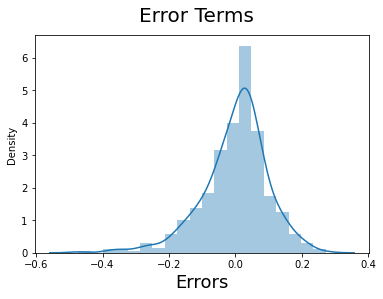

In [472]:
res = y_train-y_train_pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

* From the above histogram, we could see that the Residuals are normally distributed. Hence our assumption for Linear Regression is valid.

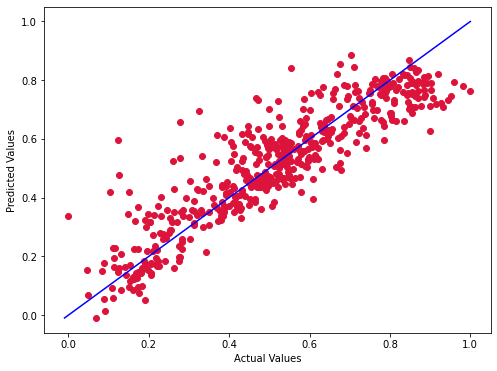

In [473]:
plt.figure(figsize=(8,6))
plt.scatter(y_train, y_train_pred, c='crimson')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
p1 = max(max(y_train_pred), max(y_train))
p2 = min(min(y_train_pred), min(y_train))
plt.plot([p1, p2], [p1, p2], 'b-')

###  Homoscedasticity

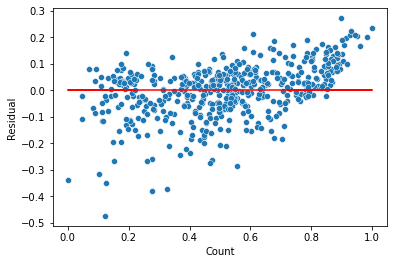

In [478]:
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

# Making Prediction Using Final Model

Now that we have fitted the model and checked the assumptions, it's time to go ahead and make predictions using the final model (lr6)

Applying the scaling on the test sets

In [480]:
num_vars = ['temp', 'atemp', 'humidity', 'windspeed','Rentals']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [481]:
df_test.head()

,Year,holiday,workingday,temp,atemp,humidity,windspeed,Rentals,season_spring,season_summer,...,month_Oct,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow,weathersit_Mist + Cloudy
22,0,0,0,0.046591,0.025950,0.453529,0.462217,0.110907,1,0,...,0,0,0,0,1,0,0,0,0,0
468,1,0,0,0.543115,0.536771,0.522511,0.347424,0.855729,0,1,...,0,0,0,1,0,0,0,0,0,0
553,1,0,0,0.951196,0.933712,0.596104,0.212829,0.534975,0,0,...,0,0,0,0,1,0,0,0,0,0
504,1,0,0,0.699909,0.662746,0.551083,0.478229,0.817648,0,1,...,0,0,0,0,1,0,0,0,0,0
353,0,0,1,0.407087,0.416610,0.618615,0.080770,0.428900,0,0,...,0,0,0,0,0,0,1,0,0,1


Dividing into X_test and y_test

In [483]:
y_test = df_test.pop('Rentals')
X_test = df_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      219 non-null    int64  
 1   holiday                   219 non-null    int64  
 2   workingday                219 non-null    int64  
 3   temp                      219 non-null    float64
 4   atemp                     219 non-null    float64
 5   humidity                  219 non-null    float64
 6   windspeed                 219 non-null    float64
 7   season_spring             219 non-null    uint8  
 8   season_summer             219 non-null    uint8  
 9   season_winter             219 non-null    uint8  
 10  month_Aug                 219 non-null    uint8  
 11  month_Dec                 219 non-null    uint8  
 12  month_Feb                 219 non-null    uint8  
 13  month_Jan                 219 non-null    uint8  
 14  month_Jul

In [484]:
#Selecting the variables that were part of final model.
col1=X_train_new.columns
X_test=X_test[col1]
# Adding constant variable to test dataframe
X_test_lm6 = sm.add_constant(X_test)
X_test_lm6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   const                  219 non-null    float64
 1   Year                   219 non-null    int64  
 2   temp                   219 non-null    float64
 3   windspeed              219 non-null    float64
 4   season_spring          219 non-null    uint8  
 5   season_winter          219 non-null    uint8  
 6   month_July             219 non-null    uint8  
 7   month_Mar              219 non-null    uint8  
 8   month_Sep              219 non-null    uint8  
 9   weekday_Sun            219 non-null    uint8  
 10  weathersit_Light Snow  219 non-null    uint8  
dtypes: float64(3), int64(1), uint8(7)
memory usage: 10.1 KB


In [486]:
# Making predictions using the final model (lr6)

y_pred = lr6.predict(X_test_lm6)

# Model Evaluation

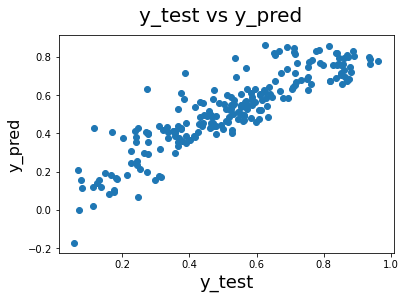

In [488]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

In [489]:
from sklearn.metrics import r2_score
#r2_scorer2_score(y_test, y_pred)
(y_test, y_pred)

0.7903760665626467

In [492]:
# We already have the value of R^2 (calculated in above step)

r2=0.7903760665626467

# Get the shape of X_test
X_test.shape

(219, 10)

In [493]:
# n is number of rows in X

n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.780297992839697

In [495]:
r2_train=0.805
r2_test=0.790

# Checking the difference between the test-train r2 score 
print('Difference in r2 Score(%)',(r2_train - r2_test)*100)

Difference in r2 Score(%) 1.5000000000000013


In [496]:
Train_Adjusted_R2 = 0.801
Test_Adjusted_R2 = 0.780

# Checking the difference between the test-train Adjusted_R2 score 
print('Difference in Adjusted_R2 Score(%)',(Train_Adjusted_R2-Test_Adjusted_R2)*100)

Difference in Adjusted_R2 Score(%) 2.100000000000002


# <span style = 'color : Green' > **FINAL REPORT**

### As per our final Model, the top 3 predictor variables that influences the bike booking are:

* Temperature (temp) - A coefficient value of ‘0.464549’ indicated that a unit increase in temp variable increases the bike hire numbers by 0.464549 units. <br>

* Year (yr) - A coefficient value of ‘0.233334’ indicated that a unit increase in year variable increases the bike hire numbers by 0.233334 units.<br>

* weekday_Sun - A coefficient value of ‘-0.036793’ indicated that a Weekday sunday, decrease the bike hire numbers by 0.036793 units.<br>

* month_Mar and month_Sep - A coefficients value of 0.054147 & 0.058492 indicated that a (Mar & Sep)month, increases the bike hire numbers by 0.054147 & 0.058492 units.<br>

* season_spring, windspeed,weathersit_light_snow are negative coefficients which decrease the bike hire numbers

### Business Goals
* Temperature could be a prime factor for making decision for the Organisation
* We can see demand for bikes was more in 2019 than 2018
* Working days(Except sunday) and Month of march and sept as they have good influence on bike rentals. So it would be great to provide offers to the working individuals on this days.